# Visualization and Analysis
 of Wrangled WeRateDogs Data Set 
 
 by Shan Jafri

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns

%matplotlib inline

In [3]:
# Change the style of the plots (http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)
matplotlib.style.use('ggplot')

In [4]:
twitter_master = pd.read_csv('twitter_archive_master.csv')
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 14 columns):
tweet_id                1993 non-null int64
tweet_date              1993 non-null object
tweet_source            1993 non-null object
tweet_text              1993 non-null object
tweet_url               1993 non-null object
rating_numerator        1993 non-null float64
rating_denominator      1993 non-null float64
dog_name                1993 non-null object
tweet_favorites         1993 non-null float64
tweet_retweets          1993 non-null float64
tweet_picture           1993 non-null object
dog_description         1993 non-null object
predicted_dog           1685 non-null object
algorithm_confidence    1993 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 218.1+ KB


In [5]:
# Change the data types

twitter_master['tweet_id'] = twitter_master['tweet_id'].astype('str')
twitter_master['tweet_date'] = pd.to_datetime(twitter_master['tweet_date'])
twitter_master['tweet_url'] = twitter_master['tweet_url'].astype('category')
twitter_master['dog_description'] = twitter_master['dog_description'].astype('category')

## Correlations

In [6]:
twitter_master.corr()

,rating_numerator,rating_denominator,tweet_favorites,tweet_retweets,algorithm_confidence
rating_numerator,1.000000,0.198240,0.015944,0.018167,-0.023075
rating_denominator,0.198240,1.000000,-0.027347,-0.020346,-0.006151
tweet_favorites,0.015944,-0.027347,1.000000,0.928997,0.076906
tweet_retweets,0.018167,-0.020346,0.928997,1.000000,0.032238
algorithm_confidence,-0.023075,-0.006151,0.076906,0.032238,1.000000


The strongest correlation is between favorite counts and retweet counts.

Text(0.5,1,'Favorites vs Retweets Scatter Plot')

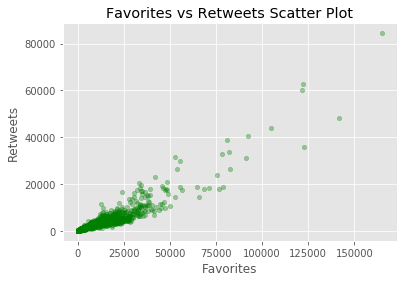

In [88]:
# Scatter plot 

twitter_master.plot( kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', 
                    alpha = .35, color = 'green')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorites vs Retweets Scatter Plot')

The figure above show a positive linear correlation between retweets and favorites.

## Dog description

Text(0.5,1,'Number of Tweets for types of Dog Description')

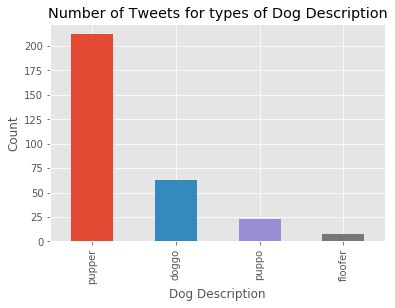

In [90]:
# A bar graph 
twitter_master.dog_description.value_counts()[1:5].plot(kind = 'bar')
plt.xlabel("Dog Description")
plt.ylabel("Count")
plt.title("Number of Tweets for types of Dog Description")

The mean and standard deviation of favorite and retweet counts for the different type of dog dscriptions.

In [104]:
# Mean
twitter_master.groupby('dog_description')['tweet_retweets', 'tweet_favorites'].mean()

,tweet_retweets,tweet_favorites
dog_description,,
None,2488.068761,8337.161826
doggo,7128.365079,20182.269841
floofer,4548.500000,13244.875000
pupper,2341.047170,7281.462264
puppo,6867.173913,23007.739130


In [103]:
# Standard Deviations
twitter_master.groupby('dog_description')['tweet_retweets', 'tweet_favorites'].std()

,tweet_retweets,tweet_favorites
dog_description,,
None,3936.122887,11455.162146
doggo,13818.143964,27240.426681
floofer,5443.451872,10183.487018
pupper,3671.304332,11411.970883
puppo,10337.712542,29731.467450


## Most Predicted Breed

Text(0,0.5,'Dog breed')

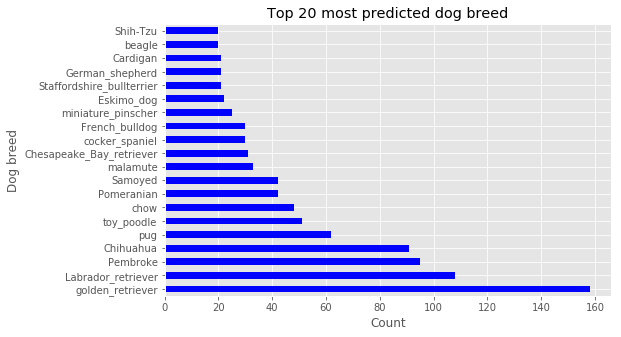

In [102]:
twitter_master.predicted_dog.value_counts()[:20].plot(kind = 'barh', color = 'blue', 
                                                      figsize = (8,5))
plt.title("Top 20 most predicted dog breed")
plt.xlabel("Count")
plt.ylabel("Dog breed")

## Conclusion

After wrangling the tweets from twitter account WeRateDogs data set, I found a positive and strong correlation between retweet and favorite counts of 0.928. The most used dog description was 'pupper' with the largest average retweets count. The dog decription 'puppo' had the second lowest count but the largest average favorites count. The top 3 most likely dog breeds the image prediction algorithms guessed were 'golden retriever', 'labrador retriever, and 'pembroke'